In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#acceder al key de kaggle
kaggle_path = os.path.abspath(os.path.join("..", ".kaggle"))
os.environ["KAGGLE_CONFIG_DIR"] = kaggle_path

In [13]:
#descargar y descomprimir data de kaggle
!mkdir -p ../data/
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -p ../data
!7z x ../data/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip -o../data

La sintaxis del comando no es correcta.


udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)

7-Zip 24.09 (x64) : Copyright (c) 1999-2024 Igor Pavlov : 2024-11-29

Scanning the drive for archives:
1 file, 31301120 bytes (30 MiB)

Extracting archive: ..\data\udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
--
Path = ..\data\udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
Type = zip
Physical Size = 31301120

Everything is Ok

Files: 3
Size:       207634372
Compressed: 31301120


In [14]:
#cargar datos
df=pd.read_csv("../data/train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [15]:
#Exploraciones basicas
df.describe()



,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [23]:
df.columns= df.columns.str.strip().str.lower()

In [24]:
#verificar nombre de las columnas
print(df.columns)

Index(['id', 'periodo', 'estu_prgm_academico', 'estu_prgm_departamento',
       'estu_valormatriculauniversidad', 'estu_horassemanatrabaja',
       'fami_estratovivienda', 'fami_tieneinternet', 'fami_educacionpadre',
       'fami_tienelavadora', 'fami_tieneautomovil', 'estu_privado_libertad',
       'estu_pagomatriculapropio', 'fami_tienecomputador',
       'fami_tieneinternet.1', 'fami_educacionmadre', 'rendimiento_global',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')


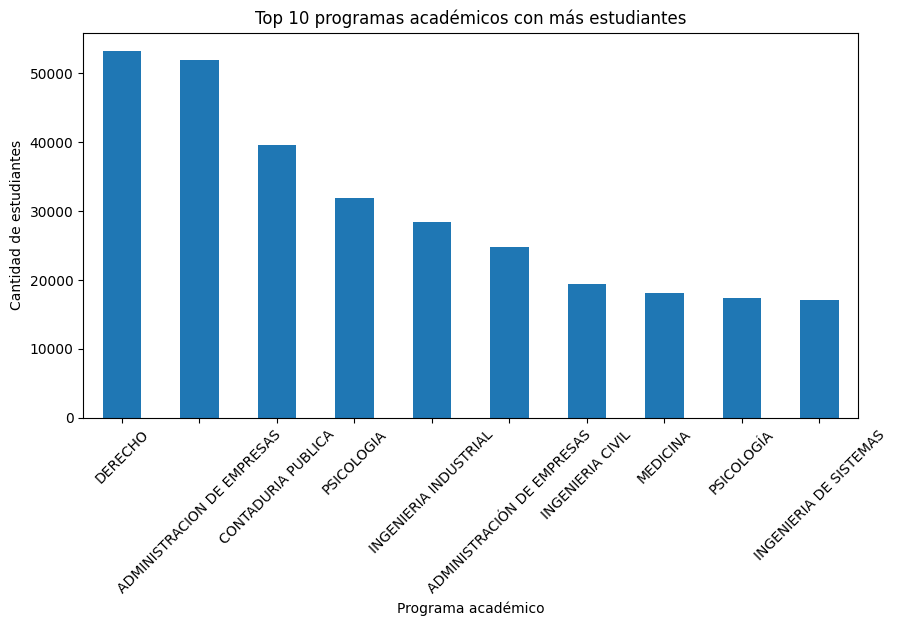

In [28]:
#estudiantes por programa academico?
df['estu_prgm_academico'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 programas académicos con más estudiantes')
plt.xlabel('Programa académico')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.show()


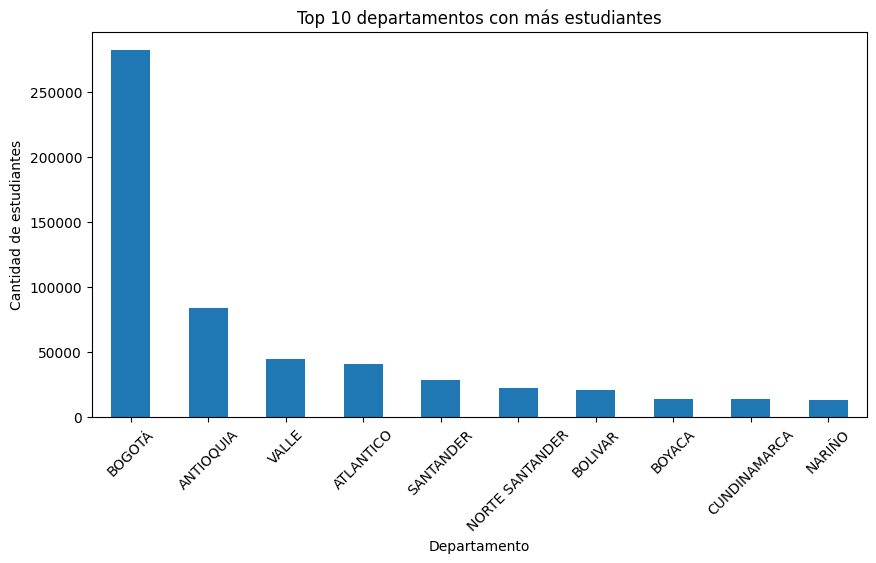

In [30]:
#Estudiantes por departamento
df['estu_prgm_departamento'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 departamentos con más estudiantes')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.show()


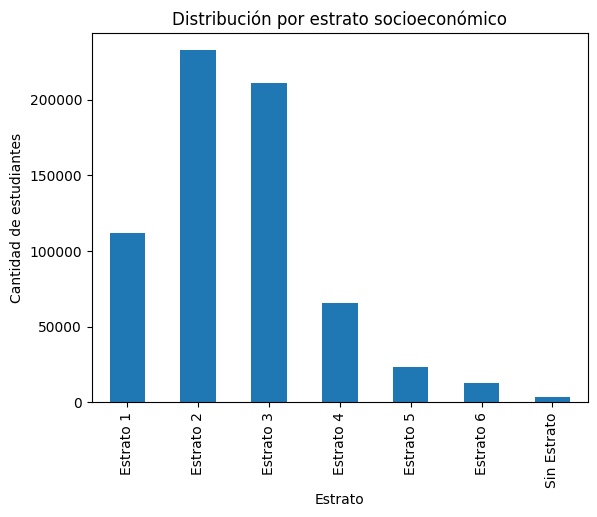

In [32]:
#Estrato socioeconomico
df['fami_estratovivienda'].value_counts().sort_index().plot(kind='bar', title='Distribución por estrato socioeconómico')
plt.xlabel('Estrato')
plt.ylabel('Cantidad de estudiantes')
plt.show()
